In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Define all necessary activation functions first**

In [2]:
#sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [3]:
#tanh activation
def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def d_tanh(z):
	return 1 - np.power(tanh(z), 2)

In [4]:
#linear activation
def identity(z):
    return np.dot(1, z)

def d_identity(z):
    z = 1
    return z

In [5]:
def mean_square_error(y_predicted, y_actual):
    return np.square(np.subtract(y_actual, y_predicted)).mean()

In [6]:
#initialize parameters
def initialize_parameters(num_neurons = 2):
    np.random.seed(1)
    w1 = np.random.rand(2, num_neurons)
    w2 = np.random.rand(num_neurons, 1)
    b1 = np.random.rand(1, 1)
    b2 = np.random.rand(1, 1)
    return w1, w2, b1, b2

**Functions for forward and backward propagation**

In [7]:
# Sigmoid activation
def forward_pass_sigmoid():
    #  taking product of activation output and input layer 
    z1 = np.dot(X_train, w1) + b1
    a1 = sigmoid(z1)

    # taking product of activation output and hidden layer  
    z2 = np.dot(a1, w2) + b2
    a2 = identity(z2)
    return z1, z2, a1, a2


def backprop_sigmoid(w1, w2, b1, b2, learning_rate = .00001):
    
    # taking partial derivatives
    dL2 = 2 * (a2 - Y_train)
    da2 = d_identity(z2)
    dz2 = a1
    da1 = d_sigmoid(z1)
    dz1 = X_train
    
    # gradients
    dw2 = np.dot(dz2.T, dL2 * da2)
    dw1 = np.dot(dz1.T, (np.dot(dL2 * d_sigmoid(a2), w2.T) * d_sigmoid(a1)))
    db2 = dL2
    db1 = np.dot(dL2 * d_sigmoid(a2), w2.T) * d_sigmoid(a1)
    
    # update weights and biases
    w2 = w2 - (dw2 * learning_rate)
    w1 = w1 - (dw1 * learning_rate)
    b2 = b2 - (db2 * learning_rate)
    b1 = b1 - (db1 * learning_rate)
    return w1, w2, b1, b2, db2, db1

In [8]:
#Linear activation
def forward_pass_identity():
    # taking product of activation output and input layer  
    z1 = np.dot(X_train, w1) + b1
    a1 = identity(z1)

    # taking product of activation output and hidden layer 
    z2 = np.dot(a1, w2) + b2
    a2 = identity(z2)
    return z1, z2, a1, a2

def backprop_identity(w1, w2, b1, b2, learning_rate = .00001):
    
    # taking partial derivatives
    dL2 = 2 * (a2 - Y_train)
    da2 = d_identity(z2)
    dz2 = a1
    da1 = d_identity(z1)
    dz1 = X_train
    
    # gradients
    dw2 = np.dot(dz2.T, dL2 * da2)
    dw1 = np.dot(dz1.T, (np.dot(dL2 * d_identity(a2), w2.T) * d_identity(a1)))
    db2 = dL2
    db1 = np.dot(dL2 * d_identity(a2), w2.T) * d_identity(a1)
    
    # update weights and biases
    w2 = w2 - (dw2 * learning_rate)
    w1 = w1 - (dw1 * learning_rate)
    b2 = b2 - (db2 * learning_rate)
    b1 = b1 - (db1 * learning_rate)
    return w1, w2, b1, b2, db2, db1

In [9]:
#tanh activation
def forward_pass_tanh():
    # taking product of activation output and input layer 
    z1 = np.dot(X_train, w1) + b1
    a1 = tanh(z1)

    # taking product of activation output and hidden layer 
    z2 = np.dot(a1, w2) + b2
    a2 = identity(z2)
    return z1, z2, a1, a2

def backprop_tanh(w1, w2, b1, b2, learning_rate = .00001):
    
    # taking partial derivatives
    dL2 = 2 * (a2 - Y_train)
    da2 = d_identity(z2)
    dz2 = a1
    da1 = d_tanh(z1)
    dz1 = X_train
    
    # gradients
    dw2 = np.dot(dz2.T, dL2 * da2)
    dw1 = np.dot(dz1.T, (np.dot(dL2 * d_tanh(a2), w2.T) * d_tanh(a1)))
    db2 = dL2
    db1 = np.dot(dL2 * d_tanh(a2), w2.T) * d_tanh(a1)
    
    # update weights and biases
    w2 = w2 - (dw2 * learning_rate)
    w1 = w1 - (dw1 * learning_rate)
    b2 = b2 - (db2 * learning_rate)
    b1 = b1 - (db1 * learning_rate)
    return w1, w2, b1, b2, db2, db1

**Test models**

In [10]:
#sigmoid
def test_model_sigmoid():
    # taking product of activation output and input layer 
    test_z1 = np.dot(X_test, w1) + np.mean(b1)
    test_a1 = sigmoid(test_z1)

    # taking product of activation output and hidden layer 
    test_z2 = np.dot(test_a1, w2) + np.mean(b2)
    test_a2 = identity(test_z2)

    test_loss = mean_square_error(test_a2, Y_test)
    print("Test Model Cost with Sigmoid Activation: {}".format(test_loss))
    
    return (test_loss, test_a2)    

In [11]:
#linear
def test_model_identity():
    # taking product of activation output and input layer 
    test_z1 = np.dot(X_test, w1) + np.mean(b1)
    test_a1 = identity(test_z1)

    # taking product of activation output and hidden layer 
    test_z2 = np.dot(test_a1, w2) + np.mean(b2)
    test_a2 = identity(test_z2)

    test_loss = mean_square_error(test_a2, Y_test)
    print("Test Model Cost with Identity Activation: {}".format(test_loss))
    
    return (test_loss, test_a2)

In [12]:
#tanh
def test_model_tanh():
    # taking product of activation output and input layer 
    test_z1 = np.dot(X_test, w1) + np.mean(b1)
    test_a1 = tanh(test_z1)

    # taking product of activation output and hidden layer 
    test_z2 = np.dot(test_a1, w2) + np.mean(b2)
    test_a2 = identity(test_z2)

    test_loss = mean_square_error(test_a2, Y_test)
    print("Test Model Cost with Tanh Activation: {}".format(test_loss))
    
    return (test_loss, test_a2)

**Main function**

In [13]:
X_train = np.loadtxt("./drive/MyDrive/X_train.csv")
X_test = np.loadtxt("./drive/MyDrive/X_test.csv")
Y_train = np.loadtxt("./drive/MyDrive/Y_train.csv")
Y_test = np.loadtxt("./drive/MyDrive/Y_test.csv")

Y_train = np.reshape(Y_train, (100, 1))
Y_test = np.reshape(Y_test, (50, 1))

In [14]:
w1, w2, b1, b2 = initialize_parameters(50)

In [15]:
loss_array = np.empty((0, 0))

In [16]:
for i in range(1000000):
    
    z1, z2, a1, a2 = forward_pass_sigmoid()
    w1, w2, b1, b2, db2, db1 = backprop_sigmoid(w1, w2, b1, b2, learning_rate=.0001)
    
    loss = mean_square_error(a2, Y_train)
    loss_array = np.append(loss_array, loss)
    
    if (i % 1000 == 0):
            print("Iteration {}: Cost: {}".format(i, loss))
    if (loss < .1):
        print("Iteration {}: Final Sigmoid Training Cost: {}".format(i, loss))
        break
    i = i + 1

Iteration 0: Cost: 5278.378230455073
Iteration 1000: Cost: 52.836115696292715
Iteration 2000: Cost: 30.975431910669418
Iteration 3000: Cost: 18.519782348995808
Iteration 4000: Cost: 11.00568685784727
Iteration 5000: Cost: 6.528650447636868
Iteration 6000: Cost: 3.872985008733827
Iteration 7000: Cost: 2.304881033548014
Iteration 8000: Cost: 1.3784395404683791
Iteration 9000: Cost: 0.8276686267042834
Iteration 10000: Cost: 0.49774213449195565
Iteration 11000: Cost: 0.29930884416358255
Iteration 12000: Cost: 0.17991983318727
Iteration 13000: Cost: 0.10817364820975685
Iteration 13155: Final Sigmoid Training Cost: 0.09997786555508979


Test Model Cost with Sigmoid Activation: 79.32899803838114


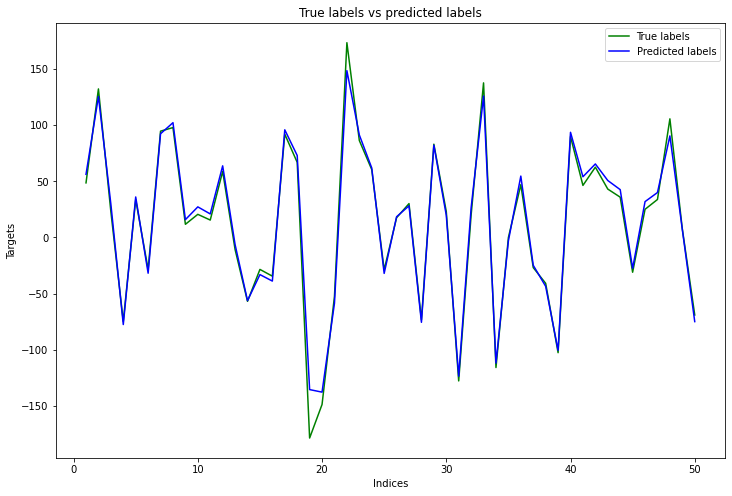

In [17]:
test_loss, test_prediction = test_model_sigmoid()
prediction_iterations = np.linspace(1, len(Y_test), len(Y_test))
plt.figure(2, figsize=(12, 8))
y_test_line, = plt.plot(prediction_iterations, Y_test, color='green')
prediction_line, = plt.plot(prediction_iterations, test_prediction, color="blue")
plt.xlabel("Indices")
plt.ylabel("Targets")
plt.title("True labels vs predicted labels")
plt.legend([y_test_line, prediction_line], ['True labels', 'Predicted labels'])

Text(0.5, 1.0, 'Training Cost vs Iterations')

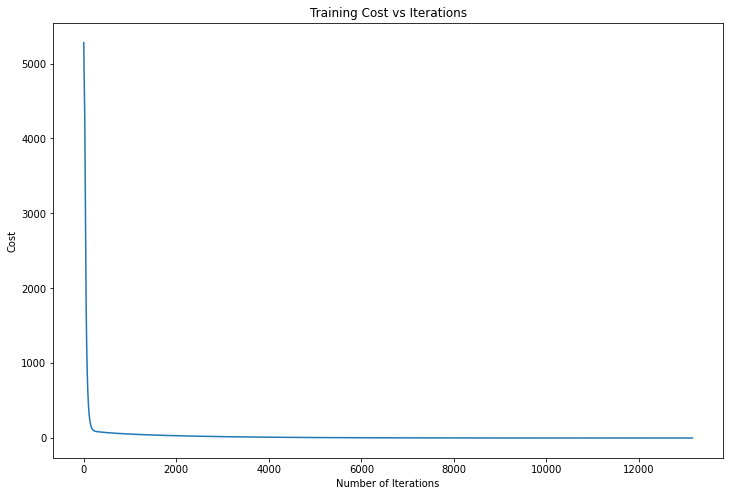

In [18]:
loss_iterations = np.linspace(1, len(loss_array), len(loss_array))
plt.figure(1, figsize=(12, 8))
plt.plot(loss_iterations, loss_array)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Training Cost vs Iterations")


Text(0.5, 1.0, 'Learning rate vs Training Cost')

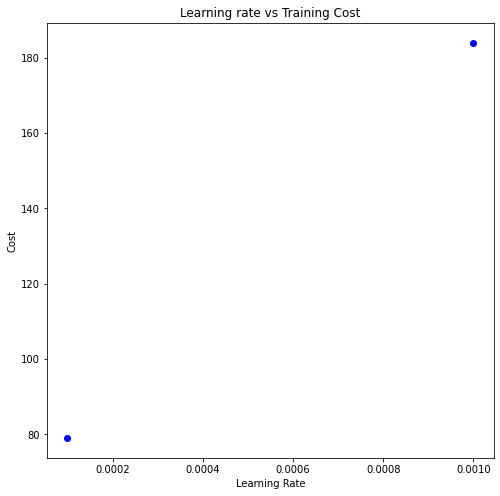

In [19]:
learning_rate_array = [.0001, .001]
cost_lr_array = [79, 184]
cost_lr_array = np.reshape(cost_lr_array, (2,1))
learning_rate_array = np.reshape(learning_rate_array, (2,1))
plt.figure(3, figsize=(8, 8))
y_test_line = plt.scatter(learning_rate_array, cost_lr_array, color='blue')
plt.xlabel("Learning Rate")
plt.ylabel("Cost")
plt.title("Learning rate vs Training Cost")

Text(0.5, 1.0, 'Cost vs Number of Neurons')

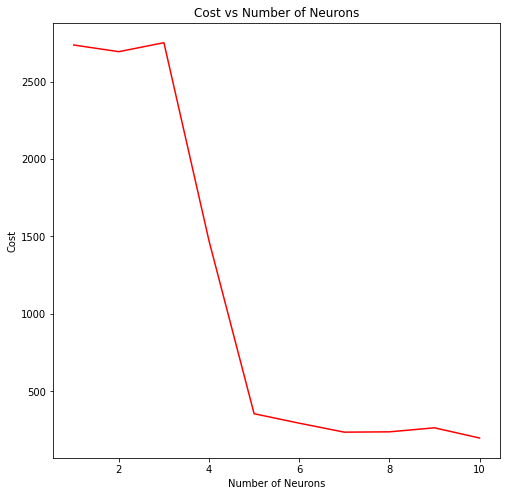

In [20]:
neuron_cost_array = [2737, 2694, 2752, 1472, 355, 294, 236, 238, 264, 198]
num_neurons_array = np.linspace(1, 10, 10)
neuron_cost_array = np.reshape(neuron_cost_array, (10,1))
num_neurons_array = np.reshape(num_neurons_array, (10,1))
plt.figure(4, figsize=(8, 8))
y_test_line = plt.plot(num_neurons_array, neuron_cost_array, color='red')
plt.xlabel("Number of Neurons")
plt.ylabel("Cost")
plt.title("Cost vs Number of Neurons")

In [21]:
# linear activation if used
X_train = np.loadtxt("./drive/MyDrive/X_train.csv")
X_test = np.loadtxt("./drive/MyDrive/X_test.csv")
Y_train = np.loadtxt("./drive/MyDrive/Y_train.csv")
Y_test = np.loadtxt("./drive/MyDrive/Y_test.csv")

Y_train = np.reshape(Y_train, (100, 1))
Y_test = np.reshape(Y_test, (50, 1))

w1, w2, b1, b2 = initialize_parameters(10)

loss_array = np.empty((0, 0))
    
for i in range(500000):
    
    z1, z2, a1, a2 = forward_pass_identity()
    w1, w2, b1, b2, db2, db1 = backprop_identity(w1, w2, b1, b2, learning_rate=.0001)
    
    loss = mean_square_error(a2, Y_train)
    loss_array = np.append(loss_array, loss)
    
    if (i % 1000 == 0):
            print("Iteration {}: Cost: {}".format(i, loss))
    if (loss < .1):
        print("Iteration {}: Final Training Cost: {}".format(i, loss))
        break
    i = i + 1
    
test_loss, test_prediction = test_model_identity()

Iteration 0: Cost: 5300.428985666396
Iteration 1000: Cost: 1871.1957064836668
Iteration 1247: Final Training Cost: 0.0855309221335227
Test Model Cost with Identity Activation: 50.56719485428985


Test Model Cost with Identity Activation: 50.56719485428985


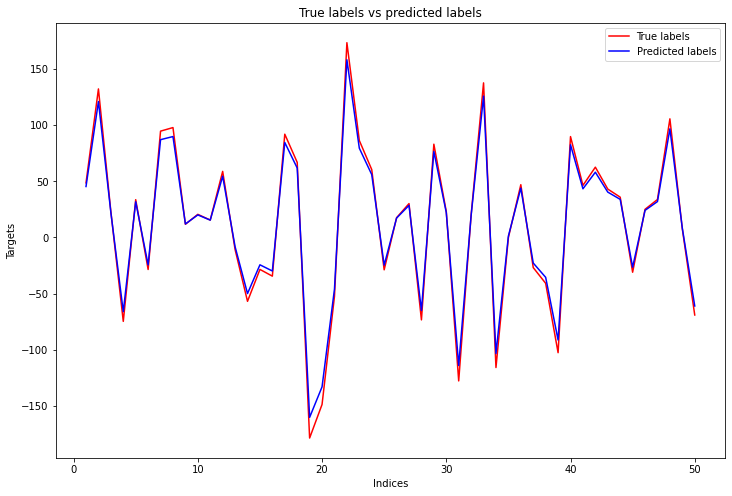

In [22]:
test_loss, test_prediction = test_model_identity()
prediction_iterations = np.linspace(1, len(Y_test), len(Y_test))
plt.figure(2, figsize=(12, 8))
y_test_line, = plt.plot(prediction_iterations, Y_test, color='red')
prediction_line, = plt.plot(prediction_iterations, test_prediction, color="blue")
plt.xlabel("Indices")
plt.ylabel("Targets")
plt.title("True labels vs predicted labels")
plt.legend([y_test_line, prediction_line], ['True labels', 'Predicted labels'])

In [23]:
# tanh activation if used
X_train = np.loadtxt("./drive/MyDrive/X_train.csv")
X_test = np.loadtxt("./drive/MyDrive/X_test.csv")
Y_train = np.loadtxt("./drive/MyDrive/Y_train.csv")
Y_test = np.loadtxt("./drive/MyDrive/Y_test.csv")
Y_train = np.reshape(Y_train, (100, 1))
Y_test = np.reshape(Y_test, (50, 1))

w1, w2, b1, b2 = initialize_parameters(10)

loss_array = np.empty((0, 0))
    
for i in range(500000):
    
    z1, z2, a1, a2 = forward_pass_tanh()
    w1, w2, b1, b2, db2, db1 = backprop_tanh(w1, w2, b1, b2, learning_rate=.0001)
    
    loss = mean_square_error(a2, Y_train)
    loss_array = np.append(loss_array, loss)
    
    if (i % 1000 == 0):
            print("Iteration {}: Cost: {}".format(i, loss))
    if (loss < .1):
        print("Iteration {}:  Tanh Training Cost: {}".format(i, loss))
        break
    i = i + 1
    
test_loss, test_prediction = test_model_tanh()

Iteration 0: Cost: 5421.944579163221
Iteration 1000: Cost: 158.6949317871844
Iteration 2000: Cost: 101.1000262015917
Iteration 3000: Cost: 64.91793371493996
Iteration 4000: Cost: 41.849257441352776
Iteration 5000: Cost: 27.03237882231092
Iteration 6000: Cost: 17.456761783970943
Iteration 7000: Cost: 11.206764059907204
Iteration 8000: Cost: 7.192822631304344
Iteration 9000: Cost: 4.630716087390972
Iteration 10000: Cost: 3.002433823901046
Iteration 11000: Cost: 1.9517193563142299
Iteration 12000: Cost: 1.2695790421071629
Iteration 13000: Cost: 0.8262984850926598
Iteration 14000: Cost: 0.5380484516306943
Iteration 15000: Cost: 0.35050998151487456
Iteration 16000: Cost: 0.22844195167894032
Iteration 17000: Cost: 0.1489577182666234
Iteration 17934:  Tanh Training Cost: 0.09995853603859266
Test Model Cost with Tanh Activation: 197.83525270948633


Test Model Cost with Tanh Activation: 197.83525270948633


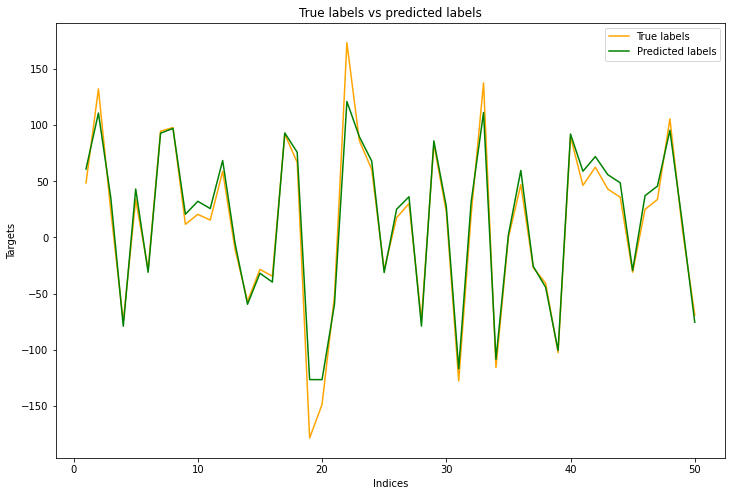

In [24]:
test_loss, test_prediction = test_model_tanh()
prediction_iterations = np.linspace(1, len(Y_test), len(Y_test))
plt.figure(2, figsize=(12, 8))
y_test_line, = plt.plot(prediction_iterations, Y_test, color='orange')
prediction_line, = plt.plot(prediction_iterations, test_prediction, color="green")
plt.xlabel("Indices")
plt.ylabel("Targets")
plt.title("True labels vs predicted labels")
plt.legend([y_test_line, prediction_line], ['True labels', 'Predicted labels'])